# **CS 557 - Assignment 4 **

#### **Group 3 Members:**
#### Parth Parab - CWID 10444835

#### Sejal Vyas - CWID 10450395

#### Shiwani Deo - CWID 10454959

**Question 1 : Apply logit regression to the 2-category data in RFMdataMPJ.xlsxPreview the document or the Iris data (Links to an external site.) with multiple categories.
Python has logistic regression capability; try the sklearn package. You are welcome to use any other, but in any case, give a reference for it. Or you are welcome to work through the Building A Logistic Regression in Python, Step by Step (Links to an external site.) tutorial and apply it to the data in the RFM and/or Iris file.**

**The Iris data describes pedal and sepal length and width for 150 Irises classified into three categories. The pedal and sepal length and width are four features to be used to train a classifier. You might want to hold out at least three Irises (one from each category) to be classified by the probability of them being in the categories and see how accurate the classifier is. When applied to NLP classification you can associate the features of some text categories with their classification in a similar manner. For pedagogic purposes the 4-feature Iris dataset is suggested since text features often tend to be much larger, such as many of the most frequent words, proper names, etc.**

Logistic Regression to classify Iris Species

In [ ]:
#import dependencies
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
#Load dataset
data = sns.load_dataset('iris')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
#Prepare the training set

X = data.iloc[:,:-1]
y = data.iloc[:, -1]

#print(X)
#print(y)

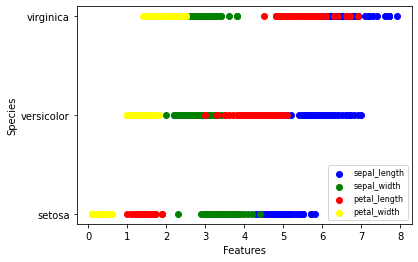

In [ ]:
# Visualize the data (relationship between each feature with each species)

plt.xlabel('Features')
plt.ylabel('Species')

pltX = data.loc[:, 'sepal_length']
pltY = data.loc[:, 'species']
plt.scatter(pltX, pltY, color='blue', label='sepal_length')

pltX = data.loc[:, 'sepal_width']
pltY = data.loc[:, 'species']
plt.scatter(pltX, pltY, color='green', label='sepal_width')

pltX = data.loc[:, 'petal_length']
pltY = data.loc[:, 'species']
plt.scatter(pltX, pltY, color='red', label='petal_length')

pltX = data.loc[:, 'petal_width']
pltY = data.loc[:, 'species']
plt.scatter(pltX, pltY, color='yellow', label='petal_width')

plt.legend(loc=4, prop={'size' : 8})
plt.show()

In [ ]:
#Split the data into 80% training and 20% testing

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#Train the model
model = LogisticRegression()
model.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#Test the model
predictions = model.predict(x_test)


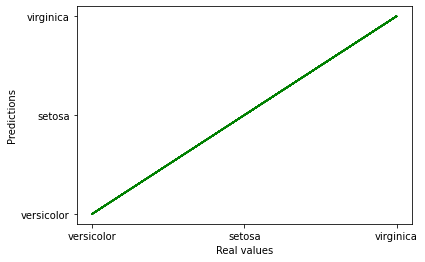

In [ ]:
plt.xlabel('Real values')
plt.ylabel('Predictions')
plt.plot(y_test, predictions, color='green')


In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
print(cm)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [ ]:
print("Printing False positives, True positives, false negatives and True negatives for the three classes")
print("Versicolor : False Negatives", cm[1][0] + cm[1][2])
print("Versicolor : False Postives", cm[0][1] + cm[2][1])
print("Versicolor : True Positive", cm[1][1])
print("Versicolor : True Negative", sum(sum(cm))-cm[1][1])
print("\n")
print("Setosa : False Negatives", cm[0][1] + cm[0][2])
print("Setosa : False Postives", cm[0][1] + cm[2][1])
print("Setosa : True Positive", cm[0][0])
print("Versicolor : True Negative", sum(sum(cm))-cm[0][0])
print("\n")
print("Virginica : False Negatives", cm[2][0] + cm[2][1])
print("Virginica : False Postives", cm[0][2] + cm[1][2])
print("Virginca : True Positive", cm[2][2])
print("Virginca : True Negative", sum(sum(cm))-cm[2][2])
print("\n")

Printing False positives, True positives, false negatives and True negatives for the three classes
Versicolor : False Negatives 0
Versicolor : False Postives 0
Versicolor : True Positive 9
Versicolor : True Negative 21


Setosa : False Negatives 0
Setosa : False Postives 0
Setosa : True Positive 10
Versicolor : True Negative 20


Virginica : False Negatives 0
Virginica : False Postives 0
Virginca : True Positive 11
Virginca : True Negative 19




In [ ]:
#Precision, recall, f1 score using in built classification report 
print(classification_report(y_test, predictions))
print("Accuracy",accuracy_score(y_test, predictions)*100, "%")

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy 100.0 %


**Question 2 : Like in the previous Assignment, train the sentiment classifier using logistic regression, but follow the directions in this paragraph. Use a corpus of tagged reviews similar to the way Amazon does it. Each review is given a tag on a scale, say, from 1 to 5, the higher the tag the more favorable the review, or as categories like favorable, unfavorable, neutral. A 5-point category scale can be very favorable, favorable, neutral, unfavorable, and very unfavorable. In any case, treat the ratings as a set of categories, not numerical values. Find files, one for favorable (Links to an external site.) words and one for unfavorable (Links to an external site.) ones, and count the number of each in each review. Also count the numbers of words that change these into the other category, like “not” and “hardly” as in “hardly amusing”, the “un-“ prefix as in “unhappy”, and the “a-“ prefix as in “amoral”, and any other negators you can think off or find. Regular expressions are useful for this. Lists of these may be more difficult to find so you may have to make some up. These counts become the features (independent variables) used as inputs to the logistic regression model. Each review has three independent variables/features: count of favorable words, count of unfavorable words, and the count of negators, and one dependent variable, the category with the highest probability. Then report a confusion matrix (example in Course Materials) to show how accurate the model matches the training set categories. If you get enough data create the training, validation, and testing partitions and use the matrix functions in Excel, the xla Excel add-in, or a matrix algebra package like MATLAB or TensorFlow.  Show your results in a confusion matrix.  For 2 categories you can use ClassifyConfusionMatrix.xlsxPreview the document., for more than two categories check here**

For this question, please upload the files reviews_Musical_Instruments_5.json.gz, positive-words.txt, negative-words.txt and negators.txt as attached in the zip along with this notebook. 
Note : Please use the files that are attached, those files only contain list of words on each line and are UTF-8 encoded. Any other file might throw an unexpected error cause by unexpected lines/characters in the file which are not handled in the code given below.

In [ ]:
import json
import gzip


In [ ]:
data = []
with gzip.open('reviews_Musical_Instruments_5.json.gz') as f:
    for l in f:
        data.append(json.loads(l.strip()))

In [ ]:
print(data[0])

{'reviewerID': 'A2IBPI20UZIR0U', 'asin': '1384719342', 'reviewerName': 'cassandra tu "Yeah, well, that\'s just like, u...', 'helpful': [0, 0], 'reviewText': "Not much to write about here, but it does exactly what it's supposed to. filters out the pop sounds. now my recordings are much more crisp. it is one of the lowest prices pop filters on amazon so might as well buy it, they honestly work the same despite their pricing,", 'overall': 5.0, 'summary': 'good', 'unixReviewTime': 1393545600, 'reviewTime': '02 28, 2014'}


In [ ]:
# convert list into pandas dataframe
import pandas as pd

df = pd.DataFrame.from_dict(data)

print(len(df))

10261


In [ ]:
print(df)
print(df.columns)

           reviewerID        asin  ... unixReviewTime   reviewTime
0      A2IBPI20UZIR0U  1384719342  ...     1393545600  02 28, 2014
1      A14VAT5EAX3D9S  1384719342  ...     1363392000  03 16, 2013
2      A195EZSQDW3E21  1384719342  ...     1377648000  08 28, 2013
3      A2C00NNG1ZQQG2  1384719342  ...     1392336000  02 14, 2014
4       A94QU4C90B1AX  1384719342  ...     1392940800  02 21, 2014
...               ...         ...  ...            ...          ...
10256  A14B2YH83ZXMPP  B00JBIVXGC  ...     1405814400  07 20, 2014
10257   A1RPTVW5VEOSI  B00JBIVXGC  ...     1404259200   07 2, 2014
10258   AWCJ12KBO5VII  B00JBIVXGC  ...     1405987200  07 22, 2014
10259  A2Z7S8B5U4PAKJ  B00JBIVXGC  ...     1404172800   07 1, 2014
10260  A2WA8TDCTGUADI  B00JBIVXGC  ...     1405468800  07 16, 2014

[10261 rows x 9 columns]
Index(['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText',
       'overall', 'summary', 'unixReviewTime', 'reviewTime'],
      dtype='object')


In [ ]:
reviewData = df[['overall', 'reviewText']].copy()
print(reviewData)

       overall                                         reviewText
0          5.0  Not much to write about here, but it does exac...
1          5.0  The product does exactly as it should and is q...
2          5.0  The primary job of this device is to block the...
3          5.0  Nice windscreen protects my MXL mic and preven...
4          5.0  This pop filter is great. It looks and perform...
...        ...                                                ...
10256      5.0            Great, just as expected.  Thank to all.
10257      5.0  I've been thinking about trying the Nanoweb st...
10258      4.0  I have tried coated strings in the past ( incl...
10259      4.0  Well, MADE by Elixir and DEVELOPED with Taylor...
10260      4.0  These strings are really quite good, but I wou...

[10261 rows x 2 columns]


In [ ]:
reviewData['positive-words'] = [0 for i in range(len(reviewData))]
reviewData['negative-words'] = [0 for i in range(len(reviewData))]
reviewData['negators'] = [0 for i in range(len(reviewData))]

In [ ]:
print(reviewData.columns)

Index(['overall', 'reviewText', 'positive-words', 'negative-words',
       'negators'],
      dtype='object')


In [ ]:
print(reviewData.iloc[1,1])

The product does exactly as it should and is quite affordable.I did not realized it was double screened until it arrived, so it was even better than I had expected.As an added bonus, one of the screens carries a small hint of the smell of an old grape candy I used to buy, so for reminiscent's sake, I cannot stop putting the pop filter next to my nose and smelling it after recording. :DIf you needed a pop filter, this will work just as well as the expensive ones, and it may even come with a pleasing aroma like mine did!Buy this product! :]


Note : below codes take some time to count negative words, positive words and negators.

In [ ]:
f = open("positive-words.txt", "r")

for word in f :
  word = word.rstrip()
  for i in range(len(reviewData)) :
    if word in reviewData.iloc[i,1] :
      reviewData.iloc[i,2] = reviewData.iloc[i,2] + 1
print(reviewData['positive-words'])


0         5
1        11
2         6
3         3
4         3
         ..
10256     1
10257    21
10258     6
10259    16
10260    12
Name: positive-words, Length: 10261, dtype: int64


In [ ]:
fn = open("negative-words.txt", "r")

for word in fn :
  word = word.rstrip()
  for i in range(len(reviewData)) :
    if word in reviewData.iloc[i,1] :
      reviewData.iloc[i,3] = reviewData.iloc[i,3] + 1
print(reviewData['negative-words'])

0         5
1        10
2         9
3         9
4         4
         ..
10256     1
10257    24
10258     6
10259    11
10260     5
Name: negative-words, Length: 10261, dtype: int64


In [ ]:
f = open("negators.txt", "r")

for word in f :
  word = word.rstrip()
  for i in range(len(reviewData)) :
    if word in reviewData.iloc[i,1] :
      reviewData.iloc[i,4] = reviewData.iloc[i,4] + 1
print(reviewData['negators'])


0        2
1        4
2        3
3        1
4        1
        ..
10256    1
10257    6
10258    3
10259    4
10260    4
Name: negators, Length: 10261, dtype: int64


In [ ]:
X = reviewData.iloc[:,2:]
print(X)
y = reviewData.iloc[:,0]
print(y)

       positive-words  negative-words  negators
0                   5               5         2
1                  11              10         4
2                   6               9         3
3                   3               9         1
4                   3               4         1
...               ...             ...       ...
10256               1               1         1
10257              21              24         6
10258               6               6         3
10259              16              11         4
10260              12               5         4

[10261 rows x 3 columns]
0        5.0
1        5.0
2        5.0
3        5.0
4        5.0
        ... 
10256    5.0
10257    5.0
10258    4.0
10259    4.0
10260    4.0
Name: overall, Length: 10261, dtype: float64


In [ ]:
#Split the data into 80% training and 20% testing

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Train the model
model2 = LogisticRegression()
model2.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#Test the model
predictions = model2.predict(x_test)


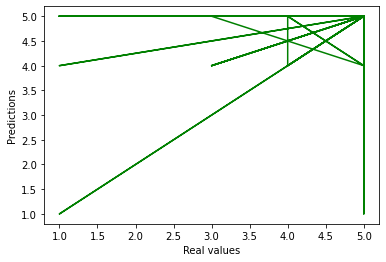

In [ ]:
plt.xlabel('Real values')
plt.ylabel('Predictions')
plt.plot(y_test, predictions, color='green')


In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
print(cm)

[[   1    0    0    1   49]
 [   0    0    0    0   53]
 [   0    0    0    2  138]
 [   0    0    0    2  409]
 [   1    0    0    2 1395]]


In [ ]:
#Precision, recall, f1 score using in built classification report 
print(classification_report(y_test, predictions))
print("Accuracy",accuracy_score(y_test, predictions)*100, "%")

              precision    recall  f1-score   support

         1.0       0.50      0.02      0.04        51
         2.0       0.00      0.00      0.00        53
         3.0       0.00      0.00      0.00       140
         4.0       0.29      0.00      0.01       411
         5.0       0.68      1.00      0.81      1398

    accuracy                           0.68      2053
   macro avg       0.29      0.20      0.17      2053
weighted avg       0.53      0.68      0.55      2053

Accuracy 68.09547004383829 %


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Question 3 : Demonstrate embeddings for a small vocabulary and some phrases/sentences. Check out word2vec_basic.py in the gensim package and similar resources. BKL may not be helpful for this but check out the online Python 3 version anyway. There are demos on line (Links to an external site.). Report the confusion matrix for the application of the model to the test set** 

For this question, word2vec embeddings are obtained by training our own model. The sentences for training this model are obtained from nltk books corpus. The code below demonstrated how to train a model, save that model for reuse, vector representation of an example word. To visualize these embeddings, the dimensions are reduced to two using PCA and are shown on a scatter plot. This plot helps verify the metrices that are later given in the evaluation section. We test the performance of model by getting the training loss and then with the help of various evaluation metrices like similarity and dissimilarity between words.

In [ ]:
!pip install --upgrade gensim

In [ ]:
import nltk   
nltk.download()          
nltk.download('inaugural')          #downloading required dependencies
nltk.download('nps_chat')
nltk.download('webtext')
nltk.download('treebank')
nltk.download('gutenberg')
nltk.download('genesis')

In [ ]:
from nltk.book import *           

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [ ]:
from gensim.models import Word2Vec

In [ ]:
# define training data
sentences = [sent1, sent2, sent3, sent4, sent5, sent6, sent7, sent8, sent9]
# train model
model = Word2Vec(sentences, min_count=1, compute_loss=True, sg=1)
# summarize the loaded model
print(model)
# summarize vocabulary
words = list(model.wv.vocab)
print(words)
# access vector for one word
print(model['sunset'])
# save model
model.save('model.bin')
# load model
new_model = Word2Vec.load('model.bin')
print(new_model)

Word2Vec(vocab=87, size=100, alpha=0.025)
['Call', 'me', 'Ishmael', '.', 'The', 'family', 'of', 'Dashwood', 'had', 'long', 'been', 'settled', 'in', 'Sussex', 'In', 'the', 'beginning', 'God', 'created', 'heaven', 'and', 'earth', 'Fellow', '-', 'Citizens', 'Senate', 'House', 'Representatives', ':', 'I', 'have', 'a', 'problem', 'with', 'people', 'PMing', 'to', 'lol', 'JOIN', 'SCENE', '1', '[', 'wind', ']', 'clop', 'KING', 'ARTHUR', 'Whoa', 'there', '!', 'Pierre', 'Vinken', ',', '61', 'years', 'old', 'will', 'join', 'board', 'as', 'nonexecutive', 'director', 'Nov.', '29', '25', 'SEXY', 'MALE', 'seeks', 'attrac', 'older', 'single', 'lady', 'for', 'discreet', 'encounters', 'THE', 'suburb', 'Saffron', 'Park', 'lay', 'on', 'sunset', 'side', 'London', 'red', 'ragged', 'cloud']
[ 3.2857750e-03  1.0577481e-03  3.8966346e-03 -4.1782823e-03
 -5.8081863e-04 -8.2981976e-04  2.0036132e-03 -4.2249341e-04
  4.1083070e-03  2.4186617e-03  4.6867141e-04  4.2657955e-03
 -4.3773446e-03  3.6748447e-03 -2.4133

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


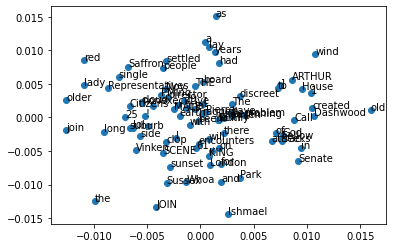

In [ ]:
from sklearn.decomposition import PCA
from matplotlib import pyplot
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [ ]:
# getting the training loss value
training_loss = model.get_latest_training_loss()
print(training_loss)

3352.139892578125


Evaluation 

In [ ]:
data=model.most_similar('people')
print(data)

[('older', 0.2276761531829834), ('single', 0.18796014785766602), ('KING', 0.18619787693023682), ('join', 0.17369641363620758), ('lady', 0.16960932314395905), ('settled', 0.16619916260242462), ('Representatives', 0.1405411958694458), ('director', 0.1368352323770523), ('created', 0.1343303620815277), ('board', 0.12716418504714966)]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


Please note the evaluation metrices align closely to the word embedding representation as shown above. Thus results like most similar word for 'KING' is obtained as 'the'. More efficienct results can be obtained if the corpus is large

In [ ]:
similarity = model.similarity('Citizens', 'people')
print(similarity)

0.019972498


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


In [ ]:
dissimilar = model.doesnt_match("long wind people heaven".split())
print(dissimilar)

wind


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `doesnt_match` (Method will be removed in 4.0.0, use self.wv.doesnt_match() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/models/keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


In [ ]:
result = model.similar_by_word("KING")
print("{}: {:.4f}".format(*result[0]))

the: 0.2141


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  """Entry point for launching an IPython kernel.


**Question 4 : Examine the methods, such as document embeddings, in A&S Ch4 from p83 on applied to sentence tokenizers. Compare them to those BKL sections on processing sentences. This is an exploratory assignment which could be open ended and possibly used as a final project. Do not get bogged down.**

Different methods are described in the books A&S and BKL to process sentences. 

In A&S, to represent document as vectors, document embedding method is decribed which is based on word2vec model. By this method, sentences/documents are represented in the form of vectors which describes the relationship between words and documents more closely as compared to other methods like Bag of words which uses one-hot encoding. 
Document Embedding method described in A&S is Doc2Vec. It is an extension of word2vec, which is used to produce document embeddings. 
To obain document embeddings, documents are appended and trained with the words in those documents. Each word is assigned a weight. There are two ways in which this is done. First is by assigning equal weights to all the words. In this case, the document embedding is the average of all the word embedding obtained.
Another way described is called Term Frequency - Inverse Document Frequency (TF-IDF). The weights of each word in this case depends on the frequency of that word. 

In the example given below, doc2vec by gensim is implemented on the text from gensim utils. The word embeddings used to obtain document embedding here are implemented by either Continous Bag of Words or Skip gram model. 

In [ ]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(common_texts)]
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

In [ ]:
vector = model.infer_vector(["system", "response"])

In [ ]:
print(documents)
print(vector)

[TaggedDocument(words=['human', 'interface', 'computer'], tags=[0]), TaggedDocument(words=['survey', 'user', 'computer', 'system', 'response', 'time'], tags=[1]), TaggedDocument(words=['eps', 'user', 'interface', 'system'], tags=[2]), TaggedDocument(words=['system', 'human', 'system', 'eps'], tags=[3]), TaggedDocument(words=['user', 'response', 'time'], tags=[4]), TaggedDocument(words=['trees'], tags=[5]), TaggedDocument(words=['graph', 'trees'], tags=[6]), TaggedDocument(words=['graph', 'minors', 'trees'], tags=[7]), TaggedDocument(words=['graph', 'minors', 'survey'], tags=[8])]
[-0.01287029  0.07082643 -0.0046724   0.07741352 -0.0240552 ]


In BKL, in one of the examples document features are indicate whether or not a given word exists in the document. The features thus obtained can later be used for classification purposes. Below is an example from the book where features from movie_reviews corpus are obtained

In [ ]:
from nltk.corpus import movie_reviews
nltk.download('movie_reviews')
import random

documents = [(list(movie_reviews.words(fileid)), category)
for category in movie_reviews.categories()
for fileid in movie_reviews.fileids(category)]
random.shuffle(documents)

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


In [ ]:
all_words = nltk.FreqDist(w.lower() for w in movie_reviews.words())
word_features = list(all_words.keys())
def document_features(document):
  document_words = set(document)
  features = {}
  for word in word_features:
    features['contains(%s)' % word] = (word in document_words)
  return features

print(document_features(movie_reviews.words('pos/cv957_8737.txt')))

{'contains(plot)': True, 'contains(:)': True, 'contains(two)': True, 'contains(teen)': False, 'contains(couples)': False, 'contains(go)': False, 'contains(to)': True, 'contains(a)': True, 'contains(church)': False, 'contains(party)': False, 'contains(,)': True, 'contains(drink)': False, 'contains(and)': True, 'contains(then)': True, 'contains(drive)': False, 'contains(.)': True, 'contains(they)': True, 'contains(get)': True, 'contains(into)': True, 'contains(an)': True, 'contains(accident)': False, 'contains(one)': True, 'contains(of)': True, 'contains(the)': True, 'contains(guys)': False, 'contains(dies)': False, 'contains(but)': True, 'contains(his)': True, 'contains(girlfriend)': True, 'contains(continues)': False, 'contains(see)': False, 'contains(him)': True, 'contains(in)': True, 'contains(her)': False, 'contains(life)': False, 'contains(has)': True, 'contains(nightmares)': False, 'contains(what)': True, "contains(')": True, 'contains(s)': True, 'contains(deal)': False, 'contains

In the book BKL, sentences are processed by using formal grammar to describe its structure. Unlike using vector representation to describe relationship between words and sentences (similarity, distance, etc), this book shows various ways in which internal organization of sentence can be represented using trees. 

In the example given below, to analyze sentence structure, first grammar has been defined. A sentence (S) is made up of various phrase structures like verb phrase (VP), noun phrase (NP),  preposition phrase (PP). The example given below generates two bracketed structures for the sentence "I shot an elephant in my pajamas"

In [ ]:
from nltk import CFG
import nltk

groucho_grammar = CFG.fromstring('''
S -> NP VP
PP -> P NP
NP -> Det N | Det N PP | 'I'
VP -> V NP | VP PP
Det -> 'an' | 'my'
N -> 'elephant' | 'pajamas'
V -> 'shot'
P -> 'in'
''')

sent = ['I', 'shot', 'an', 'elephant', 'in', 'my', 'pajamas']
parser = nltk.ChartParser(groucho_grammar)
for tree in parser.parse(sent):
  print(tree)

(S
  (NP I)
  (VP
    (VP (V shot) (NP (Det an) (N elephant)))
    (PP (P in) (NP (Det my) (N pajamas)))))
(S
  (NP I)
  (VP
    (V shot)
    (NP (Det an) (N elephant) (PP (P in) (NP (Det my) (N pajamas))))))


Thus various methods are decsribed in both the books to represent documents and the relationship between them